# Classifying Sexist/Racist tweets from Non Sexist/Racist ones (Sentiment Analysis)

Points

1) Normalization with stemming and lemmatization (try differently)
2) Stemming based on heuristics hence may produce meaningless words

In [1]:
import re
import nltk
import string
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [3]:
train = pd.read_csv("D:\Machine Learning\Analytics Vidhya\\train_E6oV3lV.csv")
test = pd.read_csv("D:\Machine Learning\Analytics Vidhya\\test_tweets_anuFYb8.csv")

##### DATA INSPECTION

In [4]:
train.drop(['id'],axis = 1,inplace = True, errors = 'ignore')
test.drop(['id'],axis = 1,inplace = True, errors = 'ignore')

In [5]:
print(len(train),len(test))

31962 17197


In [6]:
train[train['label']==0].head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,0,@user @user welcome here ! i'm it's so #gr8 !


In [7]:
train[train['label']==1].head(10)

,label,tweet
13,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,1,@user lets fight against #love #peace
68,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


#####  there are many words not required hence we will get rid of them

In [8]:
train['label'].value_counts(normalize = True)  # imbalanced 93% and 7%

0    0.929854
1    0.070146
Name: label, dtype: float64

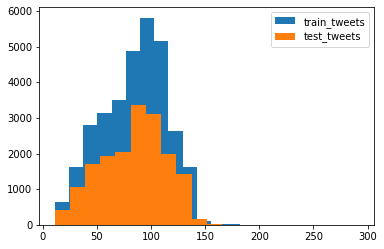

In [9]:
# checking distribution of the length of the tweets in terms of the number of letters
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train,bins = 20,label = "train_tweets")
plt.hist(length_test,bins = 20,label = "test_tweets")

plt.legend()
plt.show()

##### cleaning raw text data is an important step , helps in getting rid of unwanted words and characters which helps in obtaining better features
      hence we need to get rid of noisy and unwanted data such as punctuation, special characters, numbers, and terms which           don’t carry much weightage in context to the text.
      

In [10]:
combi = train.append(test,ignore_index = True)
combi.shape

(49159, 2)

In [11]:
def remove_pattern(input_txt,pattern):
    
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    
    return input_txt

# Cleaning

* We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.


* We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.


* Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.


* Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

In [12]:
# removing twitter handles 
""" problem with np.vectorize why"""

combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
# Removing punctuations,numbers and special characters

# expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [14]:
# removing short words, for eg hmm, oh which wont be useful

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
combi.head()

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,0.0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [16]:
type(tokenized_tweet)

pandas.core.series.Series

In [17]:
# to keep as a backup check as which performs better stemming or lemmatization
exp = tokenized_tweet

In [18]:
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

# tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [19]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sayan6619\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatization

In [21]:
# stitching the words together with mosesdetokenizer

for i in range(len(tokenized_tweet)):
    
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [22]:
combi.head()

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drag kid into dysfunction #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,0.0,factsguide: society now #motivation,factsguide society #motivation


In [23]:
combi['tidy_tweet'].head()

0                when father dysfunctional selfish drag kid into dysfunction #run
1    thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked
2                                                             bihday your majesty
3                                                      #model love take with time
4                                                  factsguide society #motivation
Name: tidy_tweet, dtype: object

#### Exploring and Asking Questions

* Most common words in the dataset

* Most common words for negative and positive tweets

* How many hastags are there in the tweet

* which trends are associated with my dataset

* which trends are associated with the positive and negative sentiments ? Are they compatible with the sentiments?


In [24]:
from wordcloud import WordCloud

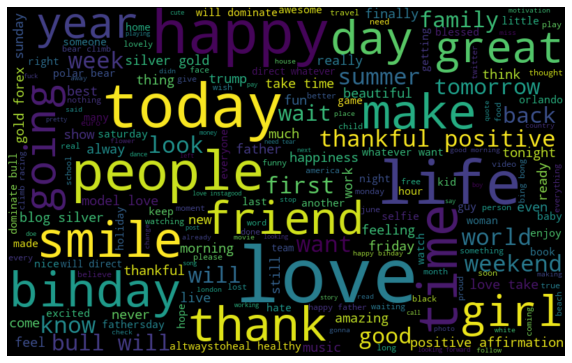

In [25]:
# using a wordcloud plot to get an idea of the frequency of each word 

all_words = ' '.join([words for words in combi['tidy_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Words like love, friend,today,thank,happi occur more frequently

most of the words are positive or neutral

It doesnt give us any idea about the words associated with sexist/racist.Hence we will plot seperate wordclouds for each of them


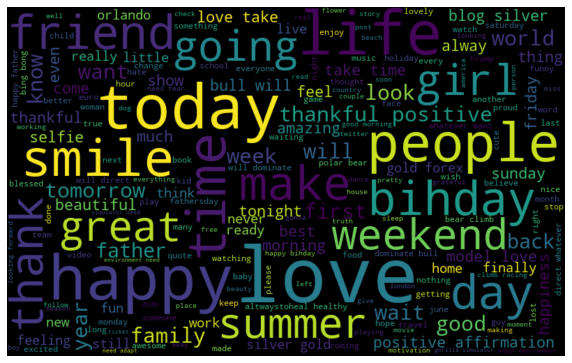

In [26]:
# Words in non racist sentiments

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets.

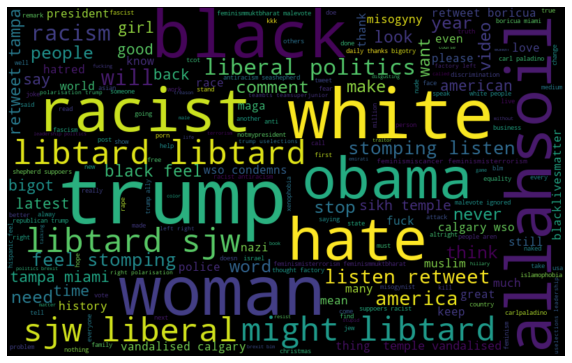

In [27]:
# Words in racist/sexist

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

As we can clearly see, most of the words have negative connotations. 
So, it seems we have a pretty good text data to work on.

Next we will the hashtags/trends in our twitter data.

##### Understanding impact of the Hashtags 

In [28]:
# Hashtags in twitter are synonymous with the trends that are ongoing at any particular point of time
# hence we will store the trend terms in 2 seperate lists

# func to collect hashtags

def hashtag_extract(x):
    
    hastags = []
    
    # loop over the words in the tweet
    
    for i in x:
        
        ht = re.findall(r"#(\w+)",i)
        hastags.append(ht)

    return hastags

In [29]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 

# unnesting list
HT_regular = sum(HT_regular,[])                # we are passing [] because that's the starter and hence is taken as 0 in general
                                               # so will give an error if not passed
HT_negative = sum(HT_negative,[])

In [30]:
HT_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 'gettingfed',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ri

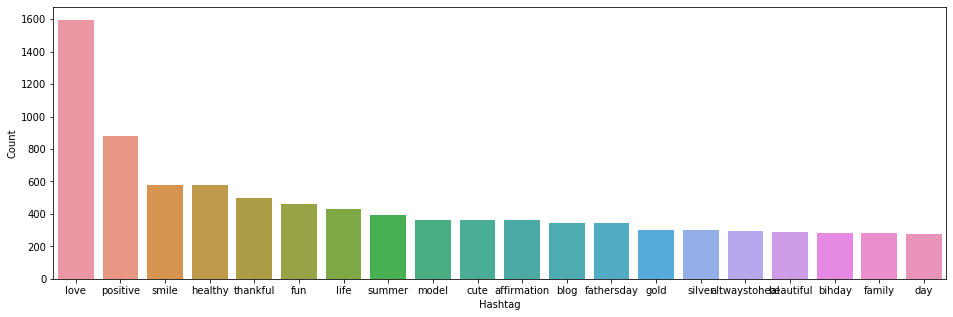

In [31]:
# gives the frequency of each word in the list
# FreqDist takes an iterable as input

a = nltk.FreqDist(HT_regular)

d = pd.DataFrame({'Hashtag' : list(a.keys()), 'Count': list(a.values())})

# selecting top 20 most frequent Hashtags\

d = d.nlargest(columns = 'Count', n = 20) # returns the 1st n rows in descending order

plt.figure(figsize = (16,5))

ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

ax.set(ylabel = 'Count') 

plt.show()

# hashtags are positive hence are synchronized

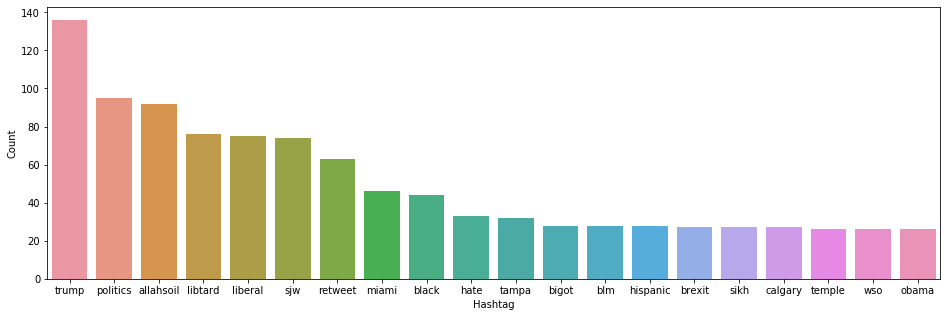

In [32]:
# For racist

b = nltk.FreqDist(HT_negative) 

e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)  
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

# negative hand in hand with few neutral terms
# So it's not a bad idea to keep these features in our data, as they contain useful information


##### Try extracting features from the tokenized Tweets

In [33]:
# To analyse preprocessed data it needs to be converted into features

# Depending upon the usage, text features can be constructed using assorted techniques

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import gensim

In [34]:
# BAG OF WORDS FEATURE

"""
Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C.
The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. 
Each row in the matrix M contains the frequency of tokens in document D(i)

Now the columns in the above matrix can be used as features to build a classification model.

"""
bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2,max_features= 1000,stop_words='english')

# max_df - ignore words while building vocab which has a freq higher than this threshold,
# min_df - """    which has a lower freq than this thrershol

bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

bow.shape



(49159, 1000)

In [35]:
# TFIDF VECTORIZER

"""
It takes the occurence of a word not in a single sentence but in the entire corpus

TF-IDF works by penalising the common words by assigning them lower weights while giving 
importance to words which are rare in the entire corpus but appear in good numbers in few documents.

1)TF = (Number of times term t appears in a document)/(Number of terms in the document)

2)IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

3)TF-IDF = TF*IDF


"""


tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape


(49159, 1000)

In [36]:
# WORD2VEC FEATURES,  WORD EMBEDDINGS ARE THE MODERN WAY 

"""
The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors 
by preserving the contextual similarity in the corpus. 

They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

The advantages of using word embeddings over BOW or TF-IDF are:

1.)Dimensionality reduction - significant reduction in the no. of features required to build a model.

2.)It capture meanings of the words, semantic relationships and the different types of contexts they are used in.

"""





'\nThe objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors \nby preserving the contextual similarity in the corpus. \n\nThey are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.\n\nThe advantages of using word embeddings over BOW or TF-IDF are:\n\n1.)Dimensionality reduction - significant reduction in the no. of features required to build a model.\n\n2.)It capture meanings of the words, semantic relationships and the different types of contexts they are used in.\n\n'

### 1.) WORD2VEC EMBEDDINGS


Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

https://s3.amazonaws.com/thinkific/file_uploads/118220/images/b06/1d1/2c7/1549270765657.jpg

We will go ahead with the Skip-gram model as it has the following advantages:

It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

Skip-gram with negative sub-sampling outperforms CBOW generally.

Complete Explaination and details - https://www.youtube.com/watch?v=UqRCEmrv1gQ

In [37]:
# We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus.

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(tokenized_tweet,size = 200,window = 5,min_count = 2,sg=1,hs = 0,negative = 10,workers=2,seed=34)

# size-desired no of features
# window - context window size
# workers - no of cores
# sg- 1 for choosing skip gram model else will give CBOW
# negative - for negative sampling

In [38]:
model_w2v.train(tokenized_tweet,total_examples = len(combi['tidy_tweet']),epochs = 20)

(6483662, 7536020)

In [39]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5509501695632935),
 ('#delegaterevolt', 0.5494446754455566),
 ('unstable', 0.5369969010353088),
 ('unfavorability', 0.534930944442749),
 ('phony', 0.5321181416511536),
 ('spouse', 0.5257139205932617),
 ('irrefutable', 0.525290846824646),
 ('disagree', 0.5231320261955261),
 ('battered', 0.5204989910125732),
 ('suppoer', 0.519254744052887)]

In [40]:
model_w2v.wv.most_similar('dinner')

[('#avocado', 0.5700705051422119),
 ('#toast', 0.5678646564483643),
 ('spaghetti', 0.5661600828170776),
 ('favs', 0.5566271543502808),
 ('decorating', 0.5545220971107483),
 ('cookout', 0.5534371137619019),
 ('desse', 0.5482603311538696),
 ('noodle', 0.5473846197128296),
 ('#lovefood', 0.5433152914047241),
 ('lamb', 0.5414396524429321)]

In [41]:
model_w2v['food'].size

200

#### Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

In [42]:
# We will use the below function to create a vector for each tweet by taking the average of the vectors of 
# the words present in the tweet.

def word_vector(tokens,size):
    
    vec =np.zeros(size).reshape((1,size))
    count = 0 
    
    for word in tokens:
        
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
        
    if count !=0:
        vec/=count
        
    return vec

In [43]:
# PREPARING WORD2VEC FEATURE SET


wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)

wordvec_df.shape

(49159, 200)

### 2.) DOC2VEC EMBEDDING

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. 
This approach is an extension of the word2vec.
The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

In [44]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar")
 
from gensim.models.doc2vec import LabeledSentence

# To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. 
# We can do so by using Gensim’s LabeledSentence() function.

def add_label(twt):
    
    output = []
    
    for i,s in zip(twt.index,twt):
        
        output.append(LabeledSentence(s,['tweet_'+str(i)]))
        
    return output
    
    

c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [45]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets
labeled_tweets

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'into', 'dysfunction', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'van', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide', 'society', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talking', 'before', 'they', 'leave', 'chaos', 'dispute', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5']),
 LabeledSentence(words=['camping', 'tomorrow', 'danny'], tags=['tweet_6']),
 LabeledSentence(words=['next', 'school', 'year', 'year', 'exam', 'think', 'about', 'that', '#school', '#exams', '#hate', '#imagine', '#actorslife', '#revolutionschool', '#girl'], tags=['tweet_7']),
 LabeledSentence(words=['love', '

In [46]:
model_d2v = gensim.models.Doc2Vec(dm = 1,dm_mean = 1,size = 200,windows = 5,negative=7,min_count = 5,workers = 3,alpha=0.1,seed=23)

# dm = 1 for ‘distributed memory’ model
# dm_mean = 1 for using mean of the context word vectors   
# no. of desired features                                  
# size - width of the context window                                  
# negative - if > 0 then negative sampling will be used    
# min_count=5, Ignores all words with total frequency lower than 5.    
# workers=3, no. of cores                                  
# alpha=0.1, learning rate                

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=16)


c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 3286227.79it/s]


In [47]:
# Preparing doc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

# LOGISTIC REGRESSION ON THE THREE TYPE OF FEATURIZED DATA

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [51]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

lreg = LogisticRegression() 


In [52]:
# training the bow

lreg.fit(xtrain_bow,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >=0.3  # setting the classification threshold at 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid,prediction_int)

0.5043327556325823

In [126]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

# submission = test[['id','label']]

In [ ]:
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [54]:
# FROM TFIDF FEATURES

train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 
# calculating f1 score for the validation set


0.5076507650765076

In [55]:
# FROM WORD2VEC FEATURES

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6060150375939849

In [56]:
# FROM DOC2VEC FEATURES

train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

# IT is failing badly to recognise things

0.35178571428571426

In [130]:
from sklearn import svm

In [131]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.4769085768143261

In [105]:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [132]:
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.46904315196998125

In [133]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5993788819875777

In [134]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.17966903073286053

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score
f1_score(yvalid, prediction)

0.5072933549432739

In [112]:
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)

In [137]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5183823529411765

In [138]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.511727078891258

In [49]:
from xgboost import XGBClassifier

In [146]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

KeyError: "['id'] not in index"

In [57]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5004516711833785

In [58]:
xgb = XGBClassifier(max_depth=8, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6500461680517082

In [59]:
import xgboost as xgb

In [60]:

# A DMATRIX CONTAINS BOTH THE FEATURES AND THE TARGET

dtrain = xgb.DMatrix(xtrain_w2v,label = ytrain)
dvalid = xgb.DMatrix(xvalid_w2v,label = yvalid)
dtest = xgb.DMatrix(test_w2v)

In [61]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [145]:
# We will prepare custom evaluation metric to calculate f1 score

def custom_eval(preds,dtrain):
    
    labels = dtrain.get_label().astype(np.int)
    preds = (preds>=0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

#### GENERAL APPROACH FOR PARAMETER TUNING

Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

Tune the learning rate.

Finally tune gamma to avoid overfitting.



In [1]:
gridsearch_params = [(max_depth, min_child_weight) for max_depth in range(6,10) for min_child_weight in range(5,8) ]

In [35]:
max_f1 = 0
best_Params = None

for max_depth, min_child_weight in gridsearch_params:
    
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
    
    
    # Finding best F1 Score
    
    mean_f1 = cv_results['test-f1_score-mean'].max()
    
    boost_rounds = cv_results['test-f1_score-mean'].argmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
            max_f1 = mean_f1
            best_params = (max_depth,min_child_weight) 
            
            
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
	F1 Score 0.6367004 for 65 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6401420000000001 for 62 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6188437999999999 for 34 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6247598 for 52 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6365881999999999 for 47 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.635013 for 49 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6302746 for 26 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6321276000000001 for 34 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6275592000000001 for 51 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6369094000000001 for 53 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6335036 for 49 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6150004 for 23 rounds
Best params: 6, 6, F1 Score: 0.6401420000000001


In [159]:
params['max_depth'] = 8
params['min_child_weight'] = 6


In [160]:
# Tuning subsample and colsample

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]

In [39]:
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
    
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.6050758 for 39 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6050758 for 39 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6050758 for 39 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6050758 for 39 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6050758 for 39 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6161576 for 50 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6161576 for 50 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6161576 for 50 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6161576 for 50 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6161576 for 50 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.5998414000000001 for 16 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.5998414000000001 for 16 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.5998414000000001 for 16 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.5

In [162]:
params['subsample'] = .8 
params['colsample_bytree'] = .5

In [163]:
# tuning the learning rate

max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
    
    
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6699949999999999 for 54 rounds
CV with eta=0.2
	F1 Score 0.6860459999999999 for 90 rounds
CV with eta=0.1
	F1 Score 0.685414 for 119 rounds
CV with eta=0.05
	F1 Score 0.6900352000000001 for 314 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.05, F1 Score: 0.6900352000000001


In [165]:
params['eta'] = .1
params

{'objective': 'binary:logistic',
 'max_depth': 8,
 'min_child_weight': 6,
 'eta': 0.1,
 'subsample': 0.8,
 'colsample_bytree': 0.5}

In [170]:
"""
Finally we can now use these tuned parameters in our xgboost model.
We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, 
then the model training will be stopped.

"""

xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=15
    
 )

[0]	Validation-error:0.06591	Validation-f1_score:0.13317
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 15 rounds.
[1]	Validation-error:0.05986	Validation-f1_score:0.13317
[2]	Validation-error:0.05788	Validation-f1_score:0.13317
[3]	Validation-error:0.05704	Validation-f1_score:0.13317
[4]	Validation-error:0.05569	Validation-f1_score:0.13320
[5]	Validation-error:0.05611	Validation-f1_score:0.36637
[6]	Validation-error:0.05652	Validation-f1_score:0.45719
[7]	Validation-error:0.05559	Validation-f1_score:0.51371
[8]	Validation-error:0.05486	Validation-f1_score:0.55258
[9]	Validation-error:0.05475	Validation-f1_score:0.57687
[10]	Validation-error:0.05392	Validation-f1_score:0.58647
[11]	Validation-error:0.05298	Validation-f1_score:0.59375
[12]	Validation-error:0.05287	Validation-f1_score:0.59708
[13]	Validation-error:0.05214	Validation-f1_score:0.59775
[14]	Validation-error:0.05214	Valid